In [1]:
# System imports
import os
import sys
from pprint import pprint as pp
from time import time as tt
import inspect
import importlib

# External imports
import matplotlib.pyplot as plt
import matplotlib.colors
import scipy as sp
from sklearn.decomposition import PCA
from sklearn.metrics import auc
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from torch_geometric.data import DataLoader
from mpl_toolkits.mplot3d import Axes3D

from itertools import chain
from random import shuffle, sample

from torch.nn import Linear
import torch.nn.functional as F
from torch_scatter import scatter, segment_csr, scatter_add
from torch_geometric.nn.conv import MessagePassing
from torch_cluster import knn_graph, radius_graph
import trackml.dataset
import torch_geometric

sys.path.append('..')

In [2]:
from LightningModules.Embedding.utils import filter_hit_pt, fetch_pt

In [45]:
bad1 = torch.load('/global/cscratch1/sd/danieltm/ExaTrkX/trackml/feature_store_endcaps_SMALLTEST/1423')
bad2 = torch.load('/global/cscratch1/sd/danieltm/ExaTrkX/trackml/feature_store_endcaps_SMALLTEST/1346')
good1 = torch.load('/global/cscratch1/sd/danieltm/ExaTrkX/trackml/feature_store_endcaps_SMALLTEST/1230')
good2 = torch.load('/global/cscratch1/sd/danieltm/ExaTrkX/trackml/feature_store_endcaps_SMALLTEST/1375')

## Good result

### 1

In [104]:
good = filter_hit_pt([good1], 1.0)[0]

In [105]:
good_pt = fetch_pt(good)

In [106]:
good_pt

array([1.2910028, 1.1413449, 1.3635843, ..., 1.35948  , 1.0586314,
       1.0892017], dtype=float32)

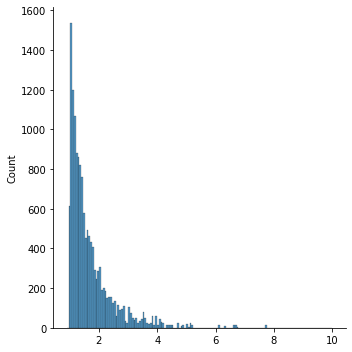

In [107]:
sns.displot(good_pt, binrange=(0.9, 10))

In [108]:
good_e = good.layerless_true_edges

In [109]:
good_pt_av = (good_pt[good_e[0]] + good_pt[good_e[1]])/2

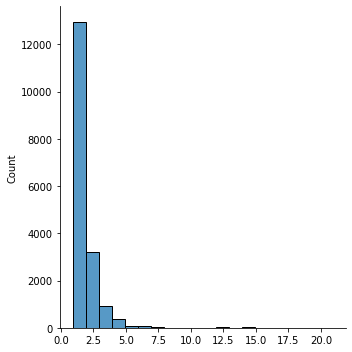

In [110]:
sns.displot(good_pt_av, binrange=(0.9, 20), binwidth= 1)

### 2

In [111]:
good = filter_hit_pt([good2], 1.0)[0]

In [112]:
good_pt = fetch_pt(good)

In [113]:
good_pt

array([1.9339756, 1.0793401, 1.5815953, ..., 1.0380954, 3.9936383,
       1.1697642], dtype=float32)

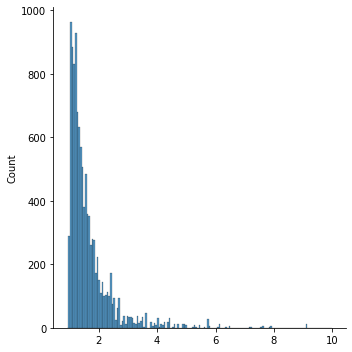

In [114]:
sns.displot(good_pt, binrange=(0.9, 10))

In [115]:
good_e = good.layerless_true_edges

In [116]:
good_pt_av = (good_pt[good_e[0]] + good_pt[good_e[1]])/2

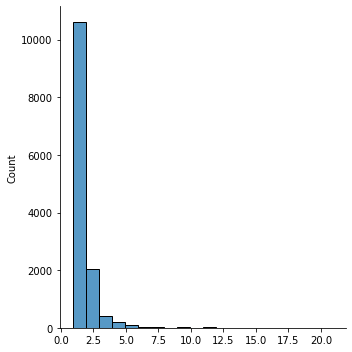

In [117]:
sns.displot(good_pt_av, binrange=(0.9, 20), binwidth= 1)

## Bad result

### 1

In [118]:
bad = filter_hit_pt([bad1], 1.0)[0]

In [119]:
bad_pt = fetch_pt(bad)

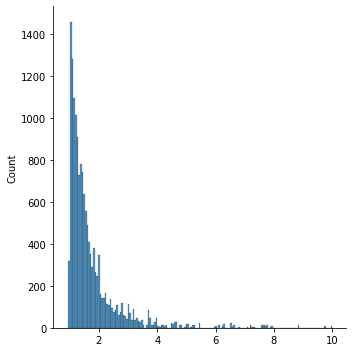

In [120]:
sns.displot(bad_pt, binrange=(0.9, 10))

In [121]:
bad_e = bad.layerless_true_edges

In [122]:
bad_pt_av = (bad_pt[bad_e[0]] + bad_pt[bad_e[1]])/2

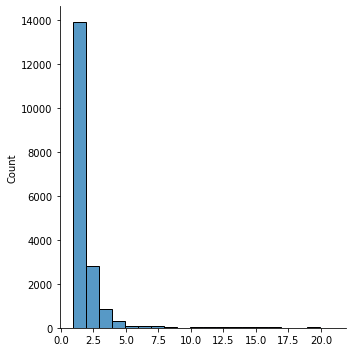

In [123]:
sns.displot(bad_pt_av, binrange=(0.9, 20), binwidth= 1)

### 2

In [124]:
bad = filter_hit_pt([bad2], 1.0)[0]

In [125]:
bad_pt = fetch_pt(bad)

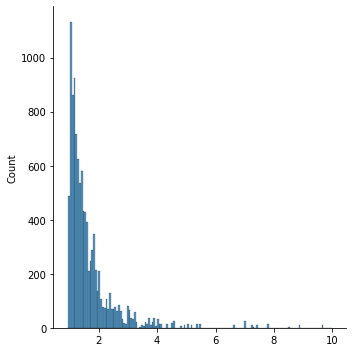

In [126]:
sns.displot(bad_pt, binrange=(0.9, 10))

In [127]:
bad_e = bad.layerless_true_edges

In [128]:
bad_pt_av = (bad_pt[bad_e[0]] + bad_pt[bad_e[1]])/2

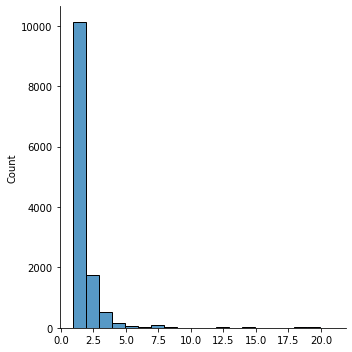

In [129]:
sns.displot(bad_pt_av, binrange=(0.9, 20), binwidth= 1)